# Image compression

In this problem, we are going to use k-means to compress images by reducing the number of colors.

The input image is $512 \times 512$ pixel size each of which is described by a $24$-bit color ($8$ bit per RGB channel). If you store the image pixel-wise it will take $512 \times 512 \times 3 = 786432$ bytes.

If we reduce the number of colors, this will reduce the number of bits stored significantly. In order to ensure the quality of the compressed images, we have to figure out what colors to keep the maximum information. Here is where k-means steps in. We will find 16 groups of similar colors and change every 24-bit color to the centroid of the corresponding group.

In [5]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

## Initialization

Loading an image for compression.

In [1]:
input_image_file = "mandrill-large.png"

Number of colors for the output image (i.e. number of clusters).

In [2]:
num_colors = num_clusters = 16

Random seed.


In [3]:
random_seed = 42

## Loading the data

Loading the data as an array of pixels.

In [7]:
input_img = img.imread(input_image_file)

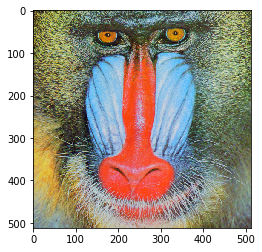

In [8]:
plt.imshow(input_img)
plt.show()

Initializing $m \times n$ training matrix.

In [9]:
color_depth = input_img.shape[-1]

In [10]:
X = input_img.reshape(-1, color_depth)

In [11]:
X.shape

(262144, 3)

## K-Means clustering

In [12]:
np.random.seed(random_seed)

Initialize centroids as colors of random pixels of the picture.

In [58]:
# =============== TODO: Your code here ===============
# Initialize centroids
indices = np.random.choice(X.shape[0], num_clusters, replace=False)
centroids = X[indices]
# ====================================================

Initizlizing a variable for storing closest centroids for every pixel.

In [79]:
closest_centroids = np.zeros(len(X))

Find the closest centroid for every data point.

In [25]:
def get_centroid(x, centroids):

    c = np.argmin(np.sum(np.abs(x - centroids), axis = 1))
    return c
    

In [26]:
def get_closest_centroids(X, centroids):
    # =============== TODO: Your code here ===============
    # Find the index of the closest centroid for each data point. The function should return np.araay.
    for i in range(0, len(X)):
        closest_centroids[i] = get_centroid(X[i], centroids)
    
    return closest_centroids
    # ====================================================

Move centroids to the mean of all assigned points.

In [27]:
def move_centroids(X, closest_centroids, num_clusters):
    # =============== TODO: Your code here ===============
    # Recompute the coordinates of each centroid. The function should return np.araay.
    for i in range(0, num_clusters):
        #get all elements that belong to cluster
        cluster_idx = np.argwhere(get_closest_centroids(X, centroids) == i)
        cluster_obj = X[cluster_idx]
        #recalculate mean
        centroid = np.mean(cluster_obj, axis = 0)
        centroids[i] = centroid
    
    return centroids
    # ====================================================

Compute k-means cost function.

In [39]:
means = np.zeros((X.shape[0], X.shape[1]))
def get_centroid_mean(centroids, closest_centroids):
    
    for i in range(0, len(closest_centroids)):
        means[i] = centroids[int(closest_centroids[i])]
        
    return means

In [52]:
def kmeans_objective(X, centroids, closest_centroids):
    # =============== TODO: Your code here ===============
    # Compute the K-Means objective function.
      
    objective = np.sum(np.power((X-get_centroid_mean(centroids, closest_centroids)),2))
    
    
    return np.random.randint(0, len(X))
    # ====================================================

In [80]:
a = closest_centroids.copy()
closest_centroids = get_closest_centroids(X, centroids)

In [64]:
centroids = move_centroids(X, closest_centroids, num_clusters)

In [81]:
np.array_equal(closest_centroids,a)

False

In [77]:
closest_centroids_old

array([0., 8., 8., ..., 8., 8., 8.])

Implement k-means iteration until convergence.

In [82]:
objective_history = []
convergence = False
iteration = 0
while not convergence:
    # =============== TODO: Your code here ===============
    # Implement k-means iteration until convergence. 
    closest_centroids_old = closest_centroids.copy()
    closest_centroids = get_closest_centroids(X, centroids)
    centroids = move_centroids(X, closest_centroids, num_clusters)
    
    #check if converge
    if np.array_equal(closest_centroids,closest_centroids_old):
        convergence = True
    
    # ====================================================
    # Compute the objective.
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)
    
    # Increase iteration counter
    iteration += 1
    
    print("Iteration: {0:2d}    Objective: {1:.3f}".format(iteration, objective))

Iteration:  1    Objective: 78294.000
Iteration:  2    Objective: 84465.000
Iteration:  3    Objective: 199611.000
Iteration:  4    Objective: 158394.000
Iteration:  5    Objective: 91430.000
Iteration:  6    Objective: 119817.000
Iteration:  7    Objective: 133521.000
Iteration:  8    Objective: 67745.000
Iteration:  9    Objective: 43160.000
Iteration: 10    Objective: 53979.000
Iteration: 11    Objective: 76615.000
Iteration: 12    Objective: 157137.000
Iteration: 13    Objective: 129065.000
Iteration: 14    Objective: 32181.000
Iteration: 15    Objective: 236345.000
Iteration: 16    Objective: 133839.000
Iteration: 17    Objective: 188856.000
Iteration: 18    Objective: 11310.000
Iteration: 19    Objective: 135374.000
Iteration: 20    Objective: 229681.000
Iteration: 21    Objective: 235616.000
Iteration: 22    Objective: 193261.000
Iteration: 23    Objective: 46674.000
Iteration: 24    Objective: 16501.000
Iteration: 25    Objective: 33988.000
Iteration: 26    Objective: 151404.00

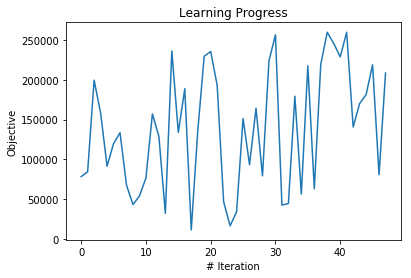

In [83]:
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="Objective")
ax.set(title="Learning Progress")

plt.show()

## Compression results

Represent each point as a closest centroid.

In [86]:
output_img =np.take(centroids, closest_centroids.astype('int'), axis = 0).reshape(input_img.shape)

Compare original and compressed images.

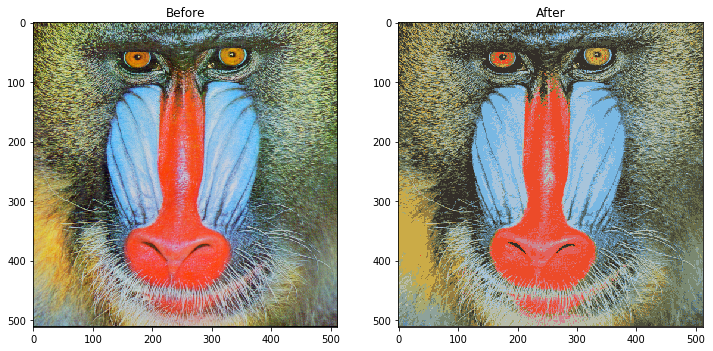

In [87]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()